In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# read in original data
## Preliminary data cleaning

In [176]:
data=pd.read_excel('all_together.xlsx')

In [177]:
data.head()

,order,settlement-date,file-id,transaction-serie-number,class,insurance-id,gender,province,insuree-type,civil-servant,...,admission-type,discharge-type,diagnosis,surgery,insurance-payment,self-payment,self1,self2,deductible,payment-date
0,1,2017-01-26,500016,0111000520000251054Y,住院,10788343300S,女,NaN,城镇老年人,不享受,...,普通,出院,大疱性类天疱疮,NaN,12916.47,20673.72,6185.62,587.55,650.0,2017-02-21
1,2,2017-01-26,432014,0111000520000251419Y,住院,11150719300S,男,NaN,退休,享受,...,特殊病病人,出院,肺恶性肿瘤,NaN,32731.45,557.34,498.45,1812.16,0.0,2017-03-03
2,3,2017-01-26,429187,0111000520000251508Y,住院,10135150801S,女,NaN,退休,不享受,...,普通,出院,老年类风湿关节炎,NaN,16091.20,924.69,2058.22,746.64,1300.0,2017-03-03
3,4,2017-01-26,501280,0111000520000251572Y,住院,10282841800S,男,NaN,社会退休人员,不享受,...,普通,出院,肺恶性肿瘤,NaN,25057.43,13732.93,2480.71,3130.94,1300.0,2017-03-03
4,5,2017-01-26,501674,0111000520000251759Y,住院,10282305101S,女,NaN,公益性组织社会化退休人员,不享受,...,普通,出院,结肠肝曲绒毛管状腺瘤,高频电刀（单极电凝使用费） + 开腹探查术 + 小肠肿瘤切除术 + 负压引流管置入术 + 全...,38268.34,5084.24,2909.16,3585.00,1300.0,2017-03-03


In [12]:
data.shape

(25381, 33)

In [179]:
# make column names consistent
data.columns=data.columns.str.replace('-','_')

In [184]:
# delete inaccurate records
data=data[data.total_amount>0]

## Split data in to data_p and data_other_too

In [185]:
data_other_too=data[data.province.isin(['天津市', '河北省', '山西省', '新疆维吾尔自治区', '山东省',
       '黑龙江省', '吉林省', '辽宁省', '青海省', '浙江省', '宁夏回族自治区', '河南省', '湖南省', '安徽省',
       '重庆市', '海南省', '福建省', '内蒙古自治区', '甘肃省', '江西省', '陕西省', '新疆生产建设兵团',
       '江苏省', '四川省', '湖北省', '广东省', '广西壮族自治区', '贵州省'])]

In [186]:
data_p=data[~data.province.isin(['天津市', '河北省', '山西省', '新疆维吾尔自治区', '山东省',
       '黑龙江省', '吉林省', '辽宁省', '青海省', '浙江省', '宁夏回族自治区', '河南省', '湖南省', '安徽省',
       '重庆市', '海南省', '福建省', '内蒙古自治区', '甘肃省', '江西省', '陕西省', '新疆生产建设兵团',
       '江苏省', '四川省', '湖北省', '广东省', '广西壮族自治区', '贵州省'])]

## Export data_p and data_other_too to excel

In [191]:
data_other_too.to_excel("other_too_from_normal.xlsx",
...              sheet_name='other_too')  

In [192]:
data_p.to_excel("data_peking.xlsx",
...              sheet_name='peking_only') 

In [193]:
data_p.shape

(24326, 33)

# All about data_p 
## Deep clean and modify

In [195]:
#check if there is duplicated rows
data_p.duplicated().sum()

0

In [20]:
data_p.describe()

,order,days,total_amount,cash_payment,personal_account_payment,upload,insurance_payment,self_payment,self1,self2,deductible
count,24326.000000,24326.000000,24326.000000,24326.000000,24326.0,2.432600e+04,24326.000000,24326.000000,24326.000000,24326.000000,24326.000000
mean,1073.761366,8.702088,23072.270610,7142.840962,0.0,2.017068e+07,15937.844464,2441.236331,1732.913159,2991.956466,751.965460
std,638.244270,8.817086,33653.887234,12669.052512,0.0,3.656905e+02,23552.415713,6811.089568,3035.740826,8321.844167,570.934982
min,1.000000,0.000000,65.180000,0.000000,0.0,2.017010e+07,0.000000,0.000000,0.000000,0.000000,0.000000
25%,530.000000,4.000000,6025.770000,1412.165000,0.0,2.017041e+07,3976.110000,99.000000,333.535000,43.055000,0.000000
50%,1059.000000,7.000000,10803.625000,2617.330000,0.0,2.017071e+07,7714.140000,497.290000,1463.515000,293.390000,650.000000
75%,1584.750000,12.000000,23017.050000,6845.347500,0.0,2.017101e+07,16166.572500,2082.067500,2093.760000,1336.500000,1300.000000
max,2573.000000,366.000000,468163.490000,305652.550000,0.0,2.018010e+07,346921.890000,302204.160000,221754.120000,186126.570000,3250.000000


In [197]:
# check if peking patients have personal account payment
data_p.personal_account_payment.unique()

array([0.])

In [198]:
data_p['cp_proportion']=data_p.cash_payment/data_p.total_amount

In [229]:
data_p['ip_proportion']=data_p['insurance_payment']/data_p['total_amount']

## Explorational data analysis

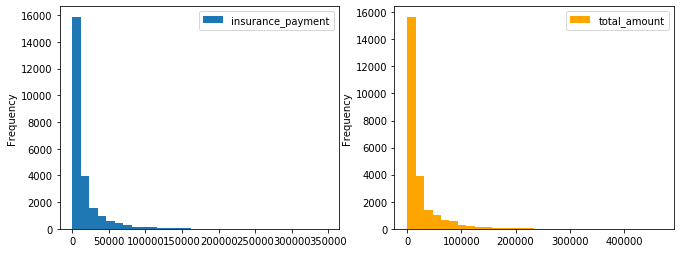

In [249]:
#Distribution of fee
fig=plt.figure()
ax1=fig.add_subplot(221)
data_p.insurance_payment.plot(kind='hist',bins=30,ax=ax1)
plt.legend()
ax2=fig.add_subplot(222)
data_p.total_amount.plot(kind='hist',bins=30,ax=ax2,color='orange')
plt.legend()

In [244]:
print('95% patients total fee is less than:')
print(data_p.total_amount.quantile(0.95))
print('50% patients total fee is less than:')
print(data_p.total_amount.quantile(0.5))

95% patients total fee is less than:
89732.32
50% patients total fee is less than:
10803.625


0.6920343256177195


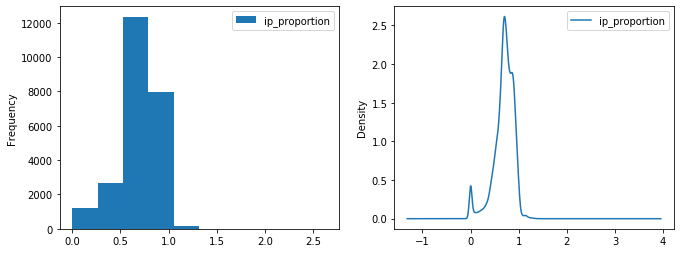

In [248]:
#病人的平均基金支付占比
print(data_p.ip_proportion.mean())
fig=plt.figure()
ax1=fig.add_subplot(221)
data_p.ip_proportion.plot(kind='hist')
plt.legend()
ax2=fig.add_subplot(222)
data_p.ip_proportion.plot(kind='kde')
plt.legend()

In [28]:
# 671 people didn't get insurance pay
(data_p.insurance_payment==0).sum()

671

In [260]:
print(f'Average hospital stay: {round(data_p.days.mean(),2)} days')

Average hospital stay: 8.7 days


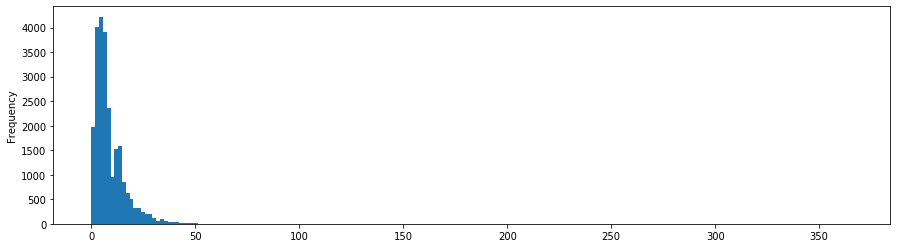

In [251]:
# Distribution of hospital stays
data_p.days.plot(kind='hist',bins=200,figsize=(15,4))

In [34]:
np.corrcoef(data_p['ip_proportion'],data_p['days'])

array([[1.        , 0.17488499],
       [0.17488499, 1.        ]])

In [35]:
# two people with 366 days in hospital
data_p[data_p.days==366]

,order,settlement_date,file_id,transaction_serie_number,class,insurance_id,gender,province,insuree_type,civil_servant,...,diagnosis,surgery,insurance_payment,self_payment,self1,self2,deductible,payment_date,cp_proportion,ip_proportion
1198,1199,2017-01-11,385503,0111000520000213289Y,住院,10173240900S,男,NaN,社会退休人员,不享受,...,腰椎管狭窄术后,NaN,18067.46,1398.10,4101.32,279.69,3250.0,2017-02-08,0.242346,0.757654
9398,1644,2017-05-05,369586,0111000520000264425Y,住院,10331864000S,男,NaN,退休,不享受,...,脑血管病后遗症,NaN,55112.77,2618.16,5846.92,11370.48,3250.0,2017-07-06,0.264656,0.735344


In [263]:
data_p.shape

(24326, 35)

## Prediction models

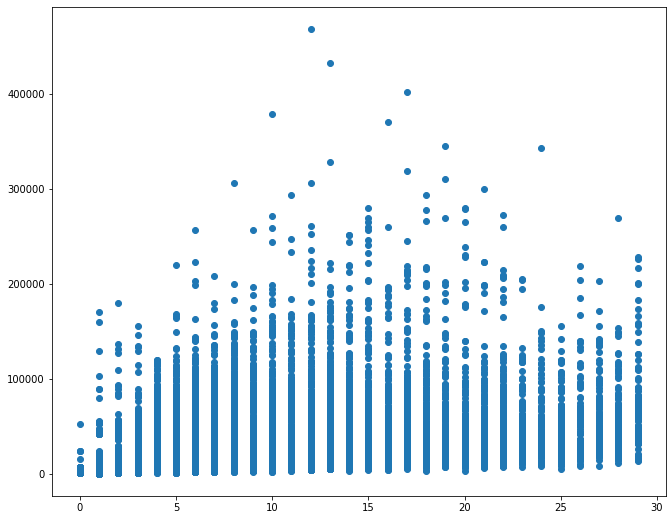

In [324]:
plt.scatter(x='days',y='total_amount',data=data_p[data_p.days<30 ])

# Time series  analysis from data_p
## Reset index to time series

In [271]:
data_ts=data_p.groupby(by='settlement_date').sum()

In [272]:
data_ts.head()

,order,days,total_amount,cash_payment,personal_account_payment,upload,insurance_payment,self_payment,self1,self2,deductible,cp_proportion,ip_proportion
settlement_date,,,,,,,,,,,,,
2017-01-03,203174,1080,2789809.11,894766.17,0.0,2279221658,1897698.18,353305.26,199525.23,342675.18,78029.45,31.741701,82.228471
2017-01-04,227460,932,2536822.93,924851.03,0.0,2743134149,1618386.28,351889.37,280965.10,295167.39,83190.51,46.396017,91.821349
2017-01-05,112932,593,1593590.44,619997.92,0.0,1452247563,975946.33,203138.92,112151.42,305599.09,53919.36,24.337432,48.685632
2017-01-06,87203,689,1770463.19,513264.90,0.0,1169866160,1258793.15,194159.06,174496.87,145597.40,41535.70,18.484873,40.009647
2017-01-09,147940,822,1903384.95,536890.70,0.0,2097691338,1368606.43,188167.33,150835.99,200074.38,79606.34,32.214963,72.626786


In [273]:
data_ts.shape

(249, 13)

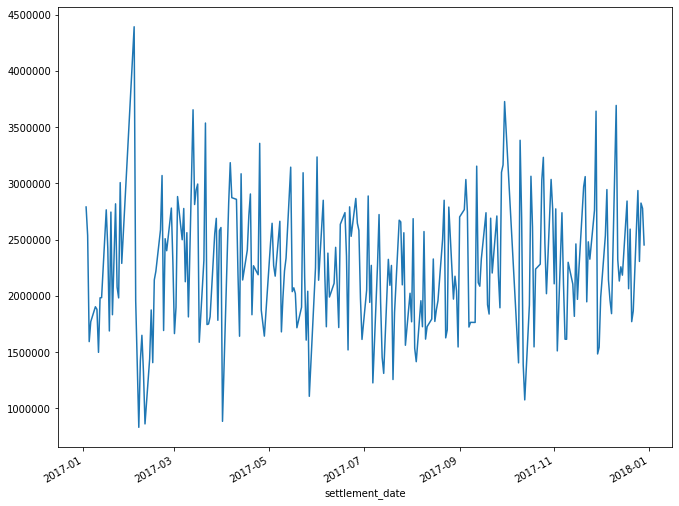

In [274]:
data_ts.total_amount.plot()

## Resample by 'B' and preprocess data

In [348]:
data_tsbta=data_ts.resample('B').mean().total_amount

In [349]:
data_tsbta.isnull().sum()

15

In [350]:
data_tsbta=pd.DataFrame(data_tsbta.interpolate('time'))

In [351]:
type(data_tsbta)

pandas.core.frame.DataFrame

In [352]:
data_tsbta['weekday']=data_tsbta.index.weekday+1

In [353]:
data_tsbta.weekday

settlement_date
2017-01-03    2
2017-01-04    3
2017-01-05    4
2017-01-06    5
2017-01-09    1
             ..
2017-12-25    1
2017-12-26    2
2017-12-27    3
2017-12-28    4
2017-12-29    5
Freq: B, Name: weekday, Length: 259, dtype: int64

In [354]:
data_tsbta['wd_sin'] = np.sin(data_tsbta.weekday*(2.*np.pi/5))
data_tsbta['wd_cos'] = np.cos(data_tsbta.weekday*(2.*np.pi/5))

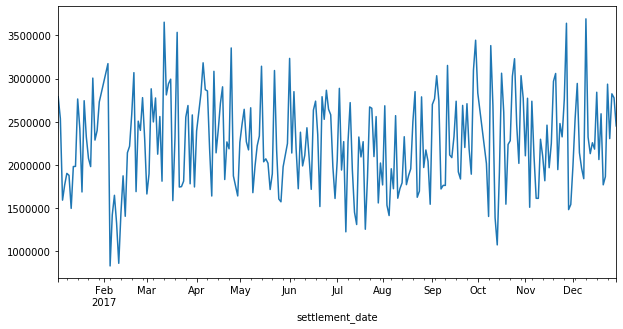

In [357]:
data_tsbta.total_amount.plot(figsize=(10,5))

## Find auto correlation, trends and seasonality 

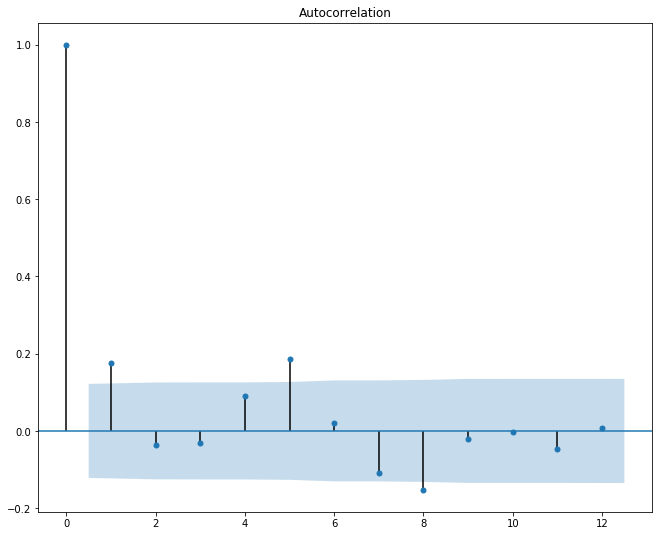

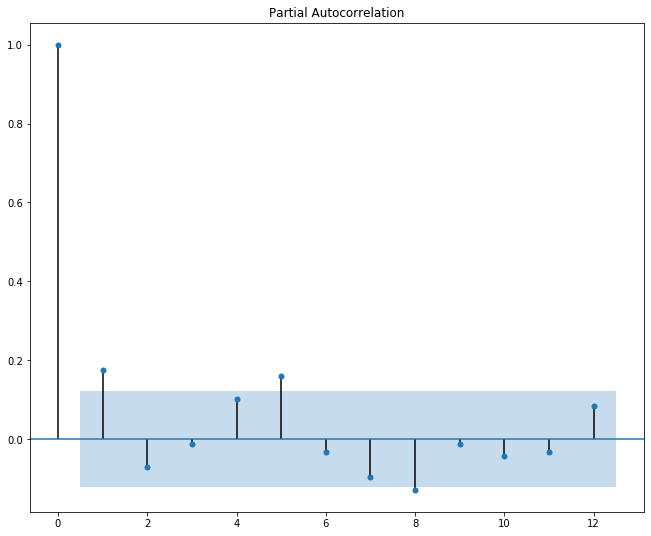

In [288]:
from statsmodels.graphics import tsaplots
ax1=tsaplots.plot_acf(data_tsbta,lags=12)
ax2=tsaplots.plot_pacf(data_tsbta,lags=12)

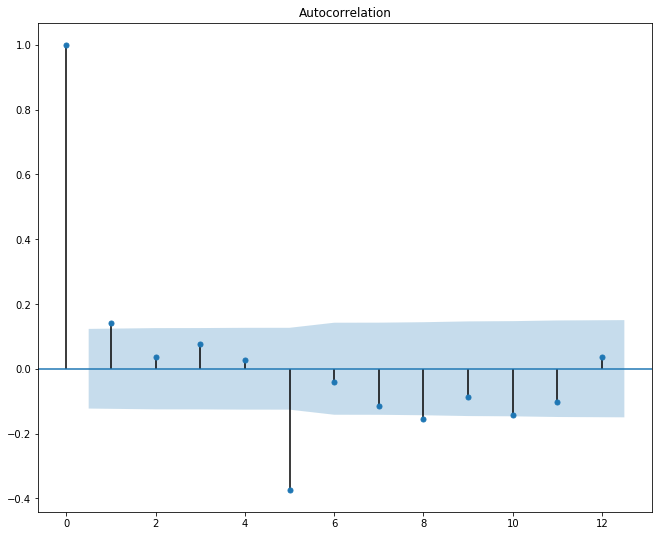

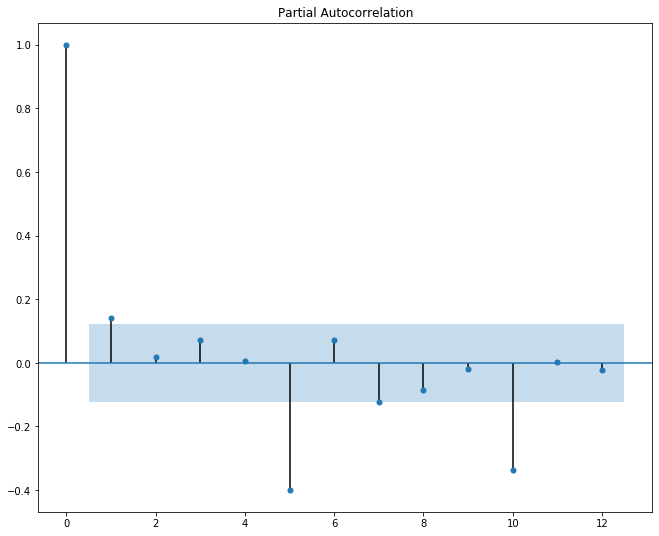

In [290]:
# shift by 5
ax1=tsaplots.plot_acf(data_tsbta.diff(5).dropna(),lags=12)
ax2=tsaplots.plot_pacf(data_tsbta.diff(5).dropna(),lags=12)

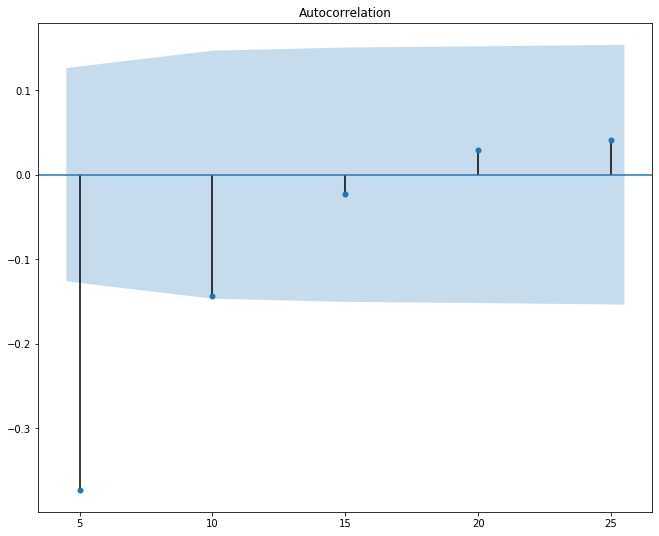

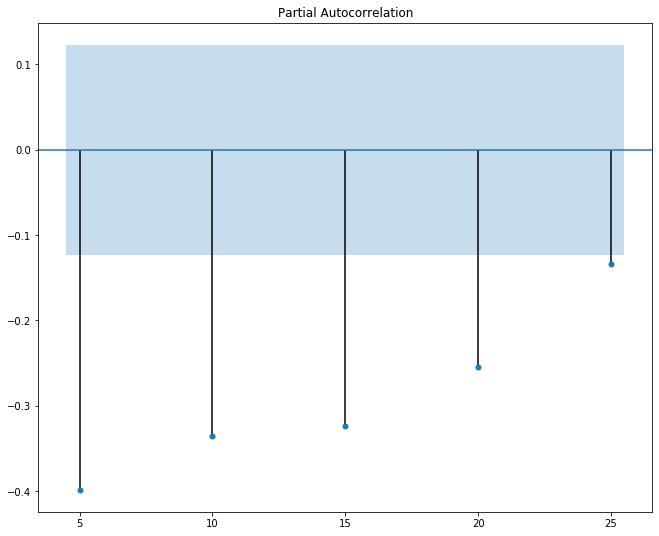

In [298]:
# shift by 5
ax1=tsaplots.plot_acf(data_tsbta.diff(5).dropna(),lags=[5,10,15,20,25])
ax2=tsaplots.plot_pacf(data_tsbta.diff(5).dropna(),lags=[5,10,15,20,25])

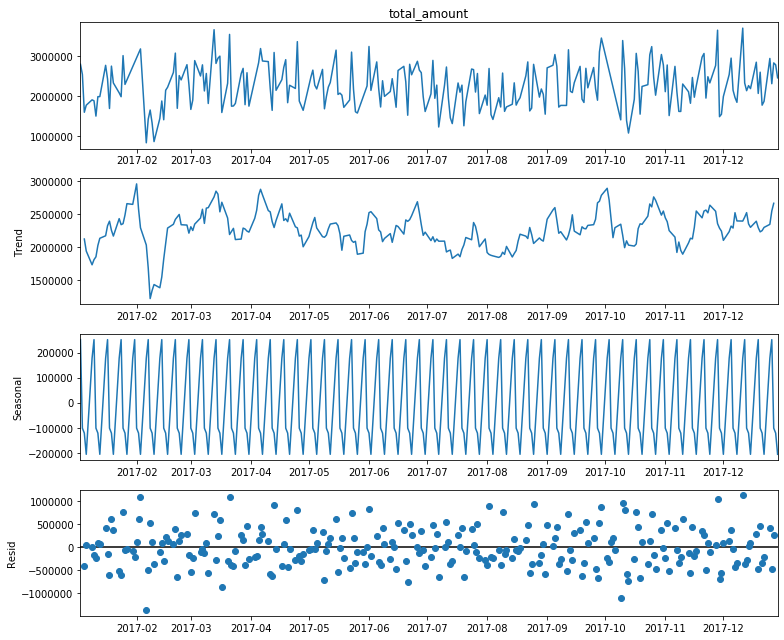

In [287]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 11,9
decomposition=sm.tsa.seasonal_decompose(data_tsbta,period=5)
fig1=decomposition.plot()
plt.show()

## Stationality test

In [289]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
# def test_stationarity(timeseries):
    # Determinig rolling Statistics
#     moving_Average = timeseries.rolling(window=7).mean()
# #     moving_std = timeseries.rolling(window=7).std()
# #     # plot rolling statistics:
#     original = plt.plot(timeseries, color = 'blue',label='Original')
#     mean = plt.plot(moving_Average, color = 'red', label='Rolling Mean')
#     std = plt.plot(moving_std, color = 'black', label = 'Rolling Std')
#     plt.legend(loc = 'best')
#     plt.title("Rolling mean and Stadndard Deviation")
#     plt.show(block = False)
#     # Dickey-Fuller test
#     print("Results of Dickey-Fuller Test:")
#     d_test = adfuller(timeseries.to, autolag = 'AIC')
#     df_output = pd.Series(d_test[0:4], index = ['Test Statistic', 'P-value',
#                                            'Lags Used', 'Num of observation Used'])
#     for key, value in d_test[4].items():
#         df_output['Critical value (%s)'%key] = value
#     print(df_output)

# adfuller(data_tsita.cash_payment)
adfuller(data_tsbta)

(-5.947891325377831,
 2.1821172436695685e-07,
 7,
 251,
 {'1%': -3.4566744514553016,
  '5%': -2.8731248767783426,
  '10%': -2.5729436702592023},
 7072.9364188922)

## Auto search models

In [294]:
import pmdarima as pm
# firstly for arima model
results = pm.auto_arima(data_tsbta,start_p=1,start_q=1,max_p=3,max_q=3, seasonal=False,m=5,D=1,start_P=1,start_Q=1,max_P=3,max_Q=3)
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  259
Model:               SARIMAX(0, 0, 1)   Log Likelihood               -3781.823
Date:                Sat, 20 Jun 2020   AIC                           7569.646
Time:                        10:27:41   BIC                           7580.317
Sample:                             0   HQIC                          7573.936
                                - 259                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.254e+06   3.95e+04     57.049      0.000    2.18e+06    2.33e+06
ma.L1          0.1911      0.062      3.076      0.002       0.069       0.313
sigma2      2.837e+11      0.009   3.13e+13      0.0

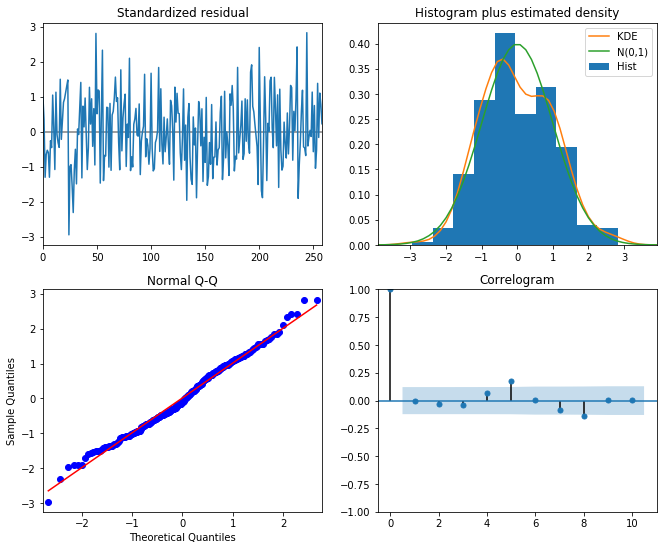

In [295]:
fig=results.plot_diagnostics()

In [296]:
import pmdarima as pm
# secondly for sarima model
results = pm.auto_arima(data_tsbta,start_p=1,start_q=1,max_p=3,max_q=3, \
                        seasonal=True,m=5,D=1,start_P=1,start_Q=1,max_P=3,max_Q=3)
print(results.summary())

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                       SARIMAX Results                                        
Dep. Variable:                                      y   No. Observations:                  259
Model:             SARIMAX(1, 0, 0)x(0, 1, [1, 2], 5)   Log Likelihood               -3729.241
Date:                                Sat, 20 Jun 2020   AIC                           7468.482
Time:                                        10:28:23   BIC                           7486.169
Sample:                                             0   HQIC                          7475.597
                                                - 259                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.309e+04   8260.103      1.585      0.113   -3099.628    2.93e+04
ar.

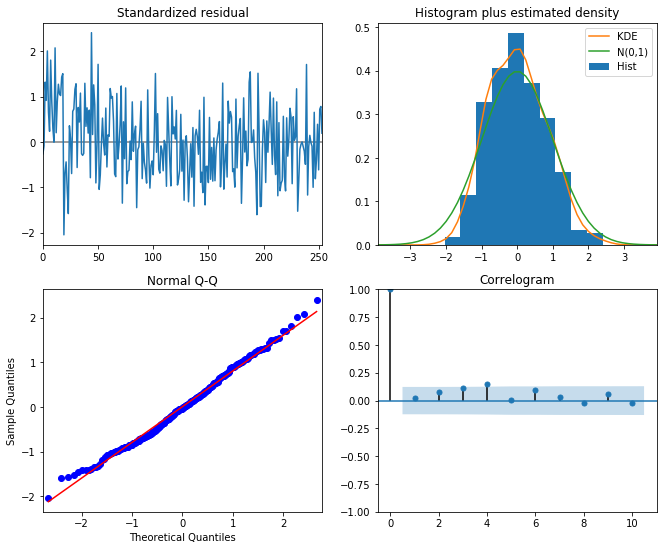

In [299]:
fig=results.plot_diagnostics()

## Fit selected models to the dataset and forecast
### ARIMA model

In [375]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

#ARIMA Model
model = SARIMAX(data_tsbta.total_amount, order=(0, 0,1),trend='c')
results=model.fit()
forecast=results.get_prediction(start=-36)
mean_forecast=forecast.predicted_mean
conf=forecast.conf_int()

In [376]:
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:           total_amount   No. Observations:                  259
Model:               SARIMAX(0, 0, 1)   Log Likelihood               -3781.823
Date:                Sun, 21 Jun 2020   AIC                           7569.646
Time:                        10:22:48   BIC                           7580.317
Sample:                    01-03-2017   HQIC                          7573.936
                         - 12-29-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2.254e+06   3.95e+04     57.049      0.000    2.18e+06    2.33e+06
ma.L1          0.1911      0.062      3.076      0.002       0.069       0.313
sigma2      2.837e+11      0.009   3.13e+13      0.0

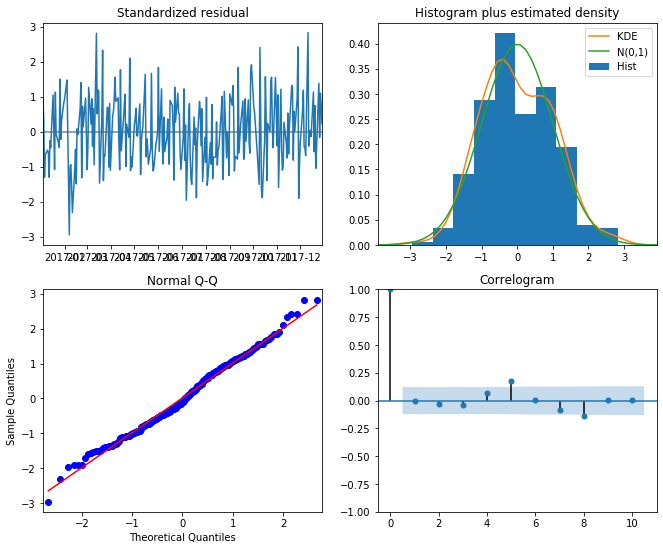

In [377]:
fig=results.plot_diagnostics()

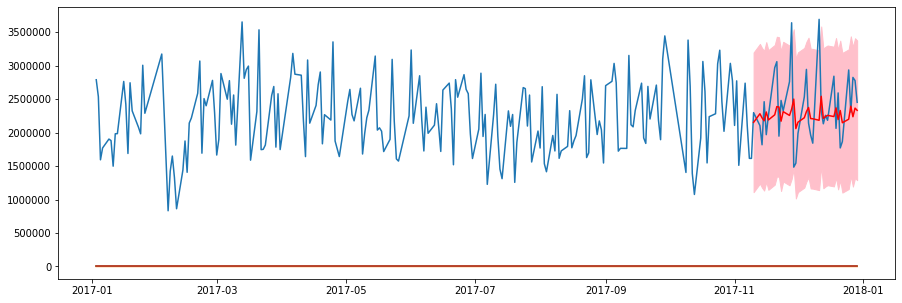

In [378]:
plt.figure(figsize=(15,5))
plt.plot(data_tsbta)
plt.plot(data_tsbta.index[-36:],mean_forecast.values,color='r',label='forecast')
plt.fill_between(data_tsbta.index[-36:],conf['lower total_amount'],conf['upper total_amount'],\
                 color='pink')
plt.show()

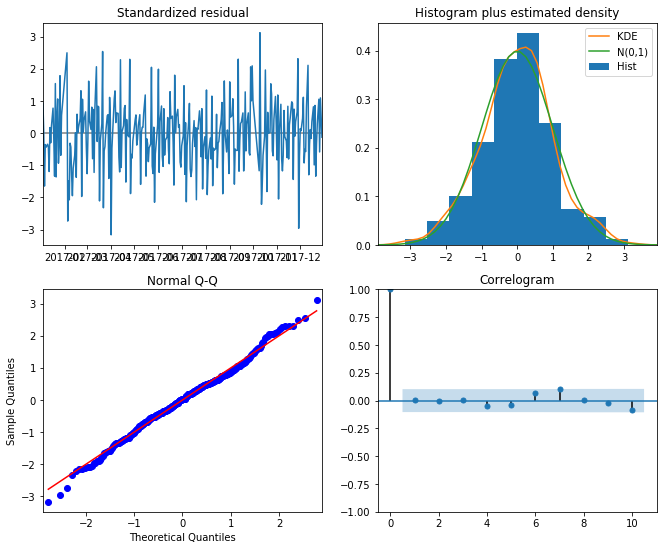

In [147]:
results.plot_diagnostics()
plt.show()

In [55]:
residuals=results.resid
mae=np.mean(np.abs(residuals))

### ARIMA combined by  exogenous feature

In [379]:
#ARIMA Model
model = SARIMAX(data_tsbta.total_amount,exog=data_tsbta[['wd_sin','wd_cos']],\
                order=(1, 0,0),trend='c')
results=model.fit()
forecast=results.get_prediction(start=-36)
mean_forecast=forecast.predicted_mean
conf=forecast.conf_int()

In [380]:
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:           total_amount   No. Observations:                  259
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -3770.602
Date:                Sun, 21 Jun 2020   AIC                           7551.203
Time:                        10:23:12   BIC                           7568.987
Sample:                    01-03-2017   HQIC                          7558.353
                         - 12-29-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.894e+06   1.26e+05     15.069      0.000    1.65e+06    2.14e+06
wd_sin      1.735e+05   4.57e+04      3.800      0.000     8.4e+04    2.63e+05
wd_cos     -1.331e+05   4.77e+04     -2.788      0.0

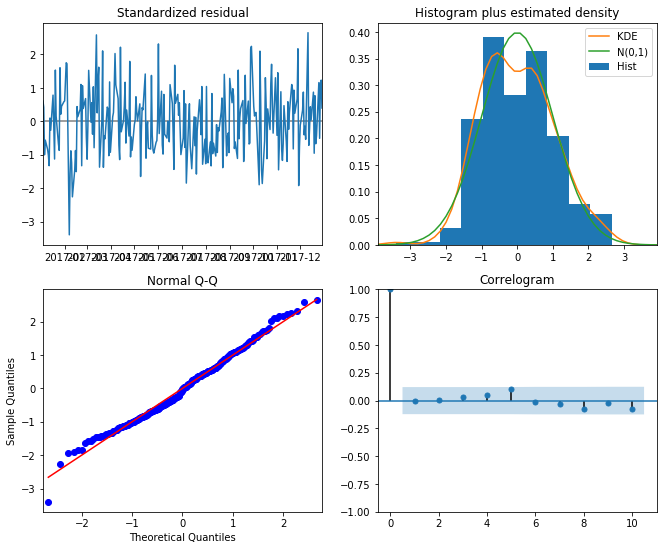

In [381]:
fig=results.plot_diagnostics()

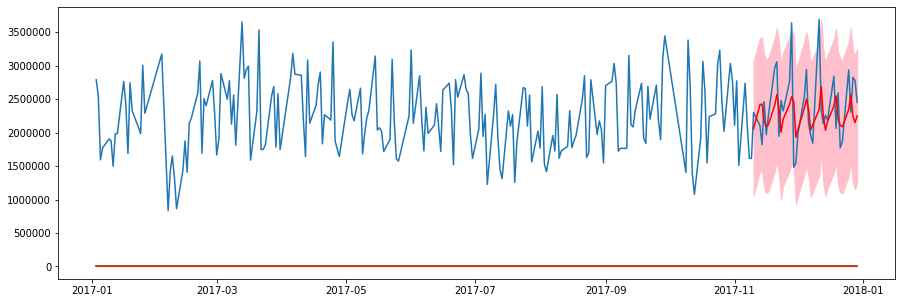

In [382]:
plt.figure(figsize=(15,5))
plt.plot(data_tsbta)
plt.plot(data_tsbta.index[-36:],mean_forecast.values,color='r',label='forecast')
plt.fill_between(data_tsbta.index[-36:],conf['lower total_amount'],conf['upper total_amount'],\
                 color='pink')
plt.show()

###  SARIMA model 

In [384]:
adfuller(data_tsbta.total_amount)

(-5.947891325377831,
 2.1821172436695685e-07,
 7,
 251,
 {'1%': -3.4566744514553016,
  '5%': -2.8731248767783426,
  '10%': -2.5729436702592023},
 7072.9364188922)

In [387]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(data_tsbta.total_amount,order=(1,0,0),seasonal_order=(0,1,1,5))
results=model.fit()
forecast=results.get_prediction(start=-36)
mean_forecast=forecast.predicted_mean
conf=forecast.conf_int()
print(results.summary())

                                      SARIMAX Results                                      
Dep. Variable:                        total_amount   No. Observations:                  259
Model:             SARIMAX(1, 0, 0)x(0, 1, [1], 5)   Log Likelihood               -3730.893
Date:                             Sun, 21 Jun 2020   AIC                           7467.787
Time:                                     10:27:18   BIC                           7478.399
Sample:                                 01-03-2017   HQIC                          7472.056
                                      - 12-29-2017                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2814      0.093      3.032      0.002       0.099       0.463
ma.S.L5       -0.9121      

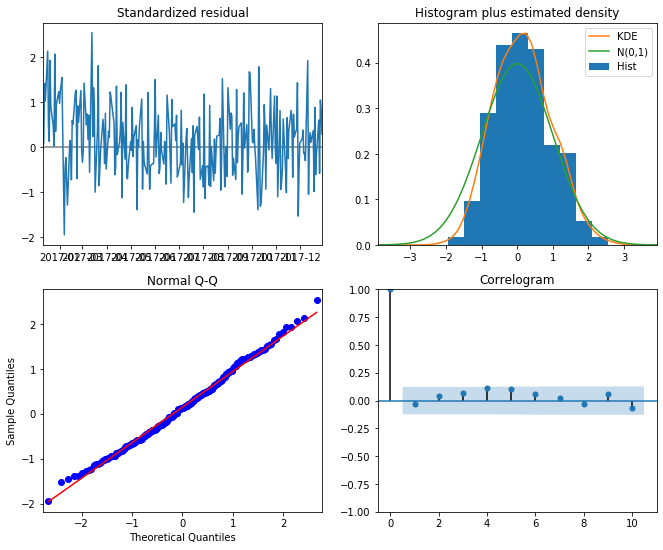

In [388]:
fig=results.plot_diagnostics()

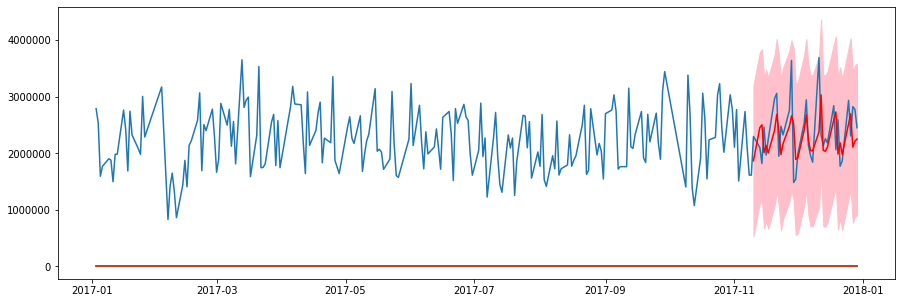

In [391]:
plt.figure(figsize=(15,5))
plt.plot(data_tsbta)
plt.plot(data_tsbta.index[-36:],mean_forecast.values,color='r',label='forecast')
plt.fill_between(data_tsbta.index[-36:],conf['lower total_amount'],conf['upper total_amount'],\
                 color='pink')
plt.show()

In [131]:

data_tsdta1=data_tsdta-data_tsdta.rolling(21).mean()
# data_tsdta2=(data_tsdta-data_tsdta.min())/(data_tsdta.max()-data_tsdta.min())

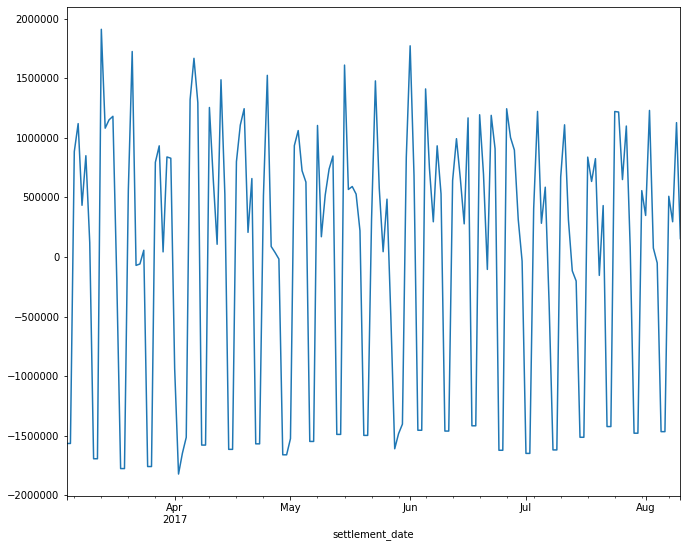

In [132]:
# data_tsdta2[60:220].plot()
data_tsdta1[60:220].plot()

In [ ]:
decomp_results=seasonal_decompose(data_tsdta,freq=7)

In [1152]:
data_tsdta.isnull().sum()

0

In [1153]:
data_tsdta=data_ts.resample('D').mean().total_amount

In [1158]:
data_tsdta.fillna(0,inplace=True)

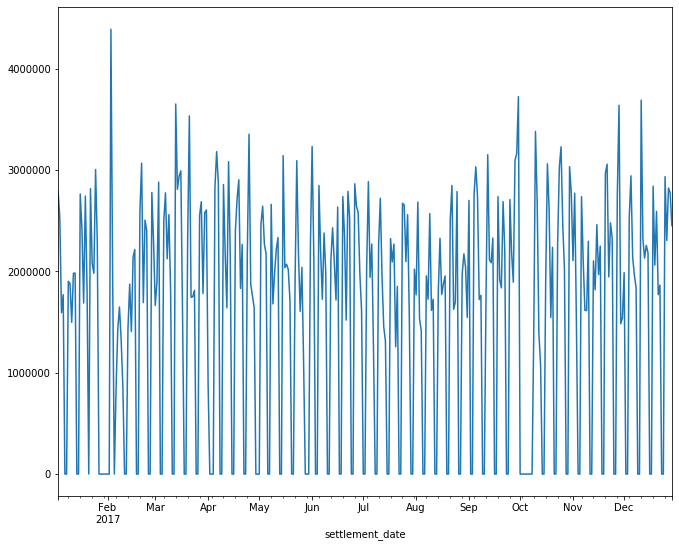

In [1159]:
data_tsdta.plot()

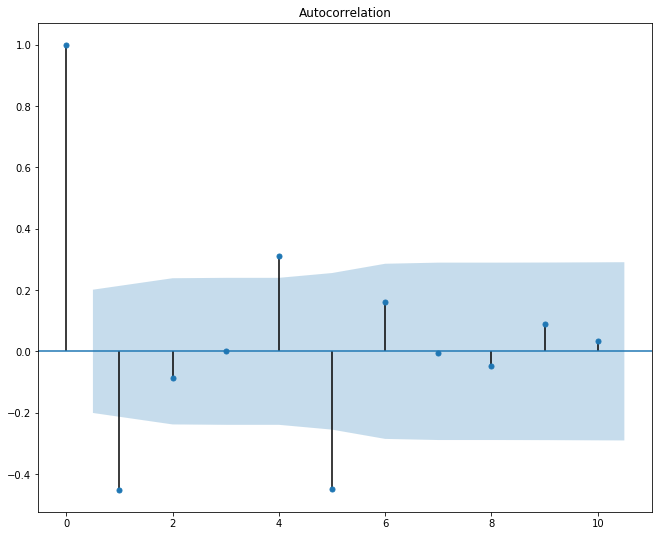

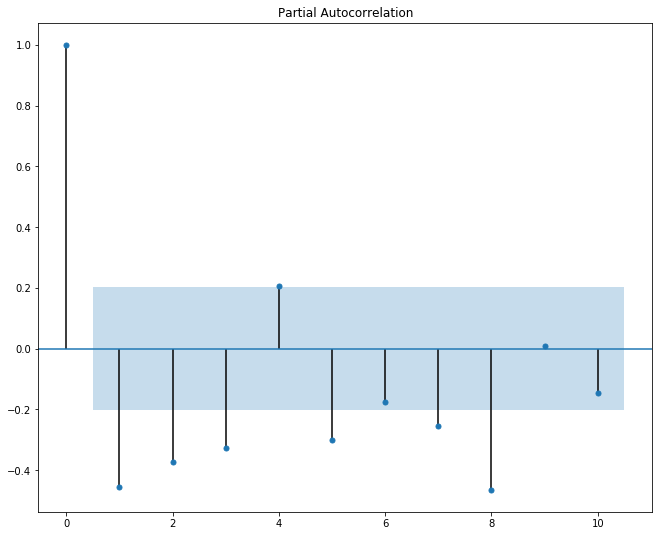

In [962]:
from statsmodels.graphics import tsaplots
ax1=tsaplots.plot_acf(data_tsita.diff(5).diff(1).dropna().cash_payment,lags=10)
ax2=tsaplots.plot_pacf(data_tsita.diff(5).diff(1).dropna().cash_payment,lags=10)

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


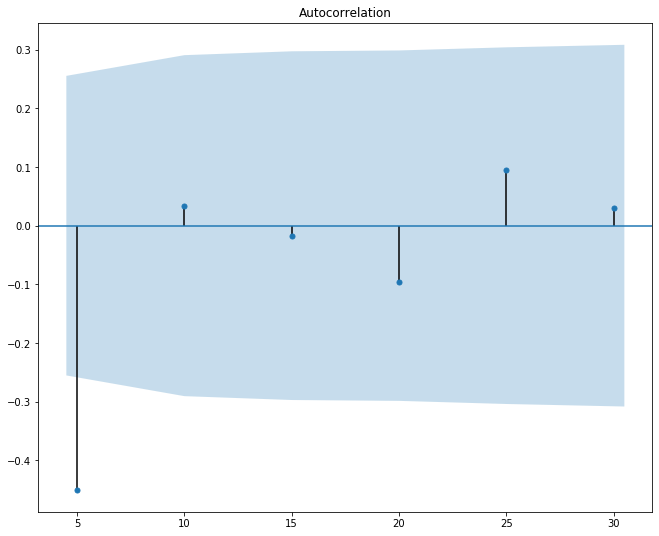

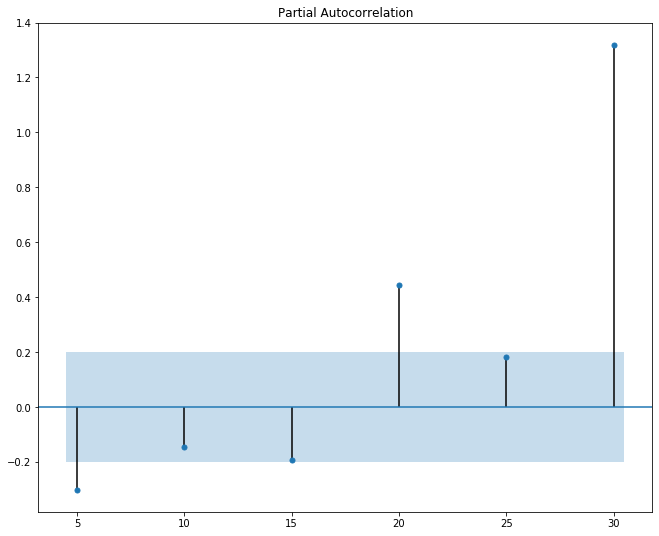

In [984]:
from statsmodels.graphics import tsaplots
ax1=tsaplots.plot_acf(data_tsita.diff(5).diff().dropna().cash_payment,lags=[5,10,15,20,25,30])
ax2=tsaplots.plot_pacf(data_tsita.diff(5).diff().dropna().cash_payment,lags=[5,10,15,20,25,30])

In [89]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
# def test_stationarity(timeseries):
    # Determinig rolling Statistics
#     moving_Average = timeseries.rolling(window=7).mean()
# #     moving_std = timeseries.rolling(window=7).std()
# #     # plot rolling statistics:
#     original = plt.plot(timeseries, color = 'blue',label='Original')
#     mean = plt.plot(moving_Average, color = 'red', label='Rolling Mean')
#     std = plt.plot(moving_std, color = 'black', label = 'Rolling Std')
#     plt.legend(loc = 'best')
#     plt.title("Rolling mean and Stadndard Deviation")
#     plt.show(block = False)
#     # Dickey-Fuller test
#     print("Results of Dickey-Fuller Test:")
#     d_test = adfuller(timeseries.to, autolag = 'AIC')
#     df_output = pd.Series(d_test[0:4], index = ['Test Statistic', 'P-value',
#                                            'Lags Used', 'Num of observation Used'])
#     for key, value in d_test[4].items():
#         df_output['Critical value (%s)'%key] = value
#     print(df_output)

# adfuller(data_tsita.cash_payment)
adfuller(data_tsdta2)

(-4.416515082190752,
 0.00027748080046175144,
 14,
 346,
 {'1%': -3.4493918438232525,
  '5%': -2.8699298018856574,
  '10%': -2.5712397066390458},
 -206.51082768692527)

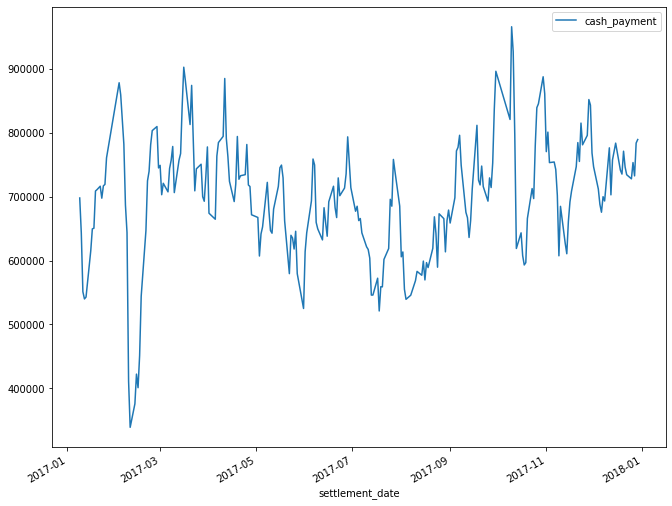

In [951]:
data_tsita.rolling(window=5).mean().plot()

In [680]:
type(data_tsita.resample('W').sum())

pandas.core.frame.DataFrame

In [716]:
data_tsita.resample('W').sum().isinfs().sum()

AttributeError: 'DataFrame' object has no attribute 'isinfs'

In [918]:
from statsmodels.tsa.arima_model import ARIMA

#ARIMA Model
model = ARIMA(data_tsdta.cash_payment, order=(1, 1, 0))
results=model.fit()
print(results.summary())

                             ARIMA Model Results                              
Dep. Variable:         D.cash_payment   No. Observations:                  360
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -4903.227
Method:                       css-mle   S.D. of innovations         198996.308
Date:                Sun, 14 Jun 2020   AIC                           9812.453
Time:                        10:31:45   BIC                           9824.112
Sample:                    01-04-2017   HQIC                          9817.089
                         - 12-29-2017                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 -747.0204   8355.326     -0.089      0.929   -1.71e+04    1.56e+04
ar.L1.D.cash_payment    -0.2560      0.051     -5.028      0.000      -0.356      -0.156
            

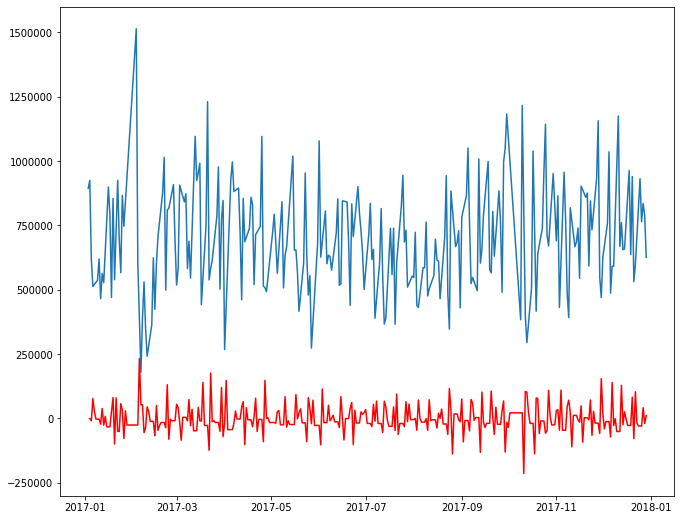

In [921]:
plt.plot(data_tsdta.cash_payment)
plt.plot(results.fittedvalues, color='red')

In [686]:
data_tsita.resample('W').sum()['forecast']=
data_tsita.resample('W').sum()['forecast']

KeyError: 'forecast'

In [724]:
data_tsita.resample('W').sum()['forecast'] = results.predict(start = 10, end= 45, dynamic= True)  
data_tsita.resample('W').sum()[['cash_payment', 'forecast']].plot(figsize=(15, 8))

KeyError: "['forecast'] not in index"

In [989]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(data_tsita.cash_payment,order=(0,0,1),seasonal_order=(1,1,0,5))
results=model.fit()
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                       cash_payment   No. Observations:                  249
Model:             SARIMAX(0, 0, 1)x(1, 1, [], 5)   Log Likelihood               -3367.938
Date:                            Sun, 14 Jun 2020   AIC                           6741.877
Time:                                    12:48:14   BIC                           6752.368
Sample:                                         0   HQIC                          6746.102
                                            - 249                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1102      0.069      1.597      0.110      -0.025       0.245
ar.S.L5       -0.3460      0.065   

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


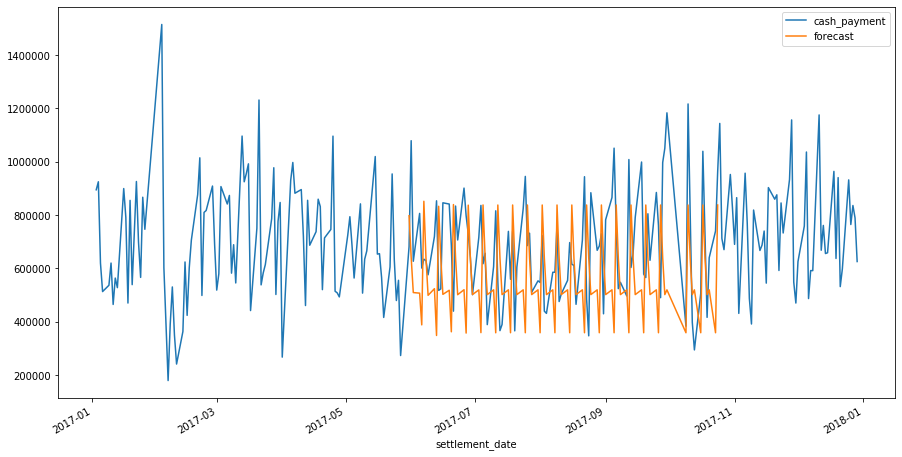

In [990]:
data_tsita['forecast'] = results.predict(start = 100, end=200 , dynamic= True)  
data_tsita[['cash_payment', 'forecast']].plot(figsize=(15, 8))

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


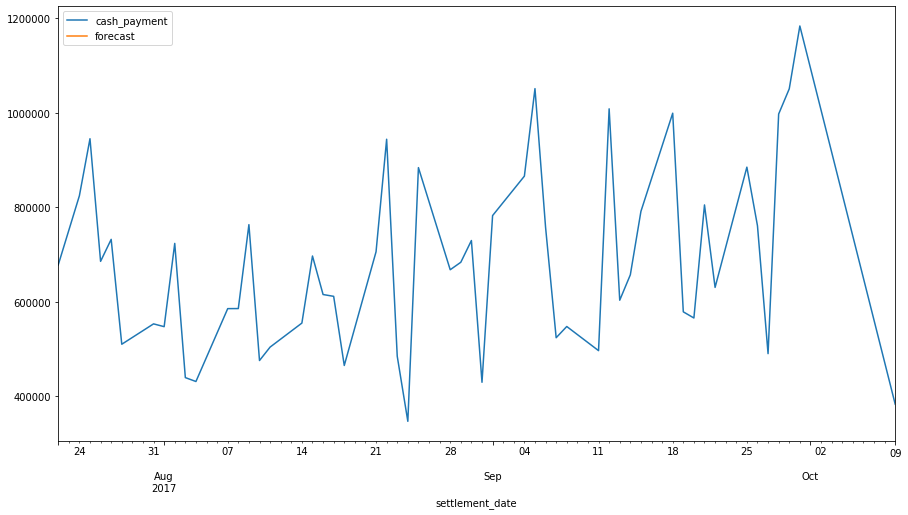

In [956]:
data_tsdta['forecast'] = results.predict(start = 200, end= 345, dynamic= True)  
data_tsdta[['cash_payment', 'forecast']].iloc[200:280,:].plot(figsize=(15, 8))